In [1]:
%load_ext autoreload
%autoreload 2

%config IPCompleter.greedy=True

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from astropy import units

import importlib

import snapshot_obj
import simulation_tracing
import dataset_compute
import subhalo

In [3]:
importlib.reload(snapshot_obj)
importlib.reload(simulation_tracing)
importlib.reload(dataset_compute)
importlib.reload(subhalo)

<module 'subhalo' from '/home/kasper/Curvaton_Simulations/APOSTLE_analysis/subhalo.py'>

# Plotting trajectories of halos

## Tracing a satellite

In [4]:
sim_id = "V1_MR_fix"
start = 127; stop = 100

First, identify the central halo through snapshots:

In [5]:
gn=2
snap_z0 = snapshot_obj.Snapshot(sim_id, start)
sim_tracer = simulation_tracing.SimulationTracer(snap_z0)
sim_trace, snap_ids = sim_tracer.trace_all(stop=100)

In [6]:
%time central = subhalo.SubhaloTracer(gn, 0, sim_tracer)

CPU times: user 245 ms, sys: 20.1 ms, total: 266 ms
Wall time: 288 ms


Then, select a satellite that can be traced back through a couple snapshots (for instance, the M31 satellite (1,4)):

In [7]:
sgn=7
%time satellite = subhalo.SubhaloTracer(gn, sgn, sim_tracer)

CPU times: user 236 ms, sys: 28 ms, total: 264 ms
Wall time: 287 ms


In [8]:
%time d = satellite.distance_to_central(central)
d = d * units.cm.to(units.kpc)

CPU times: user 4.48 s, sys: 371 ms, total: 4.86 s
Wall time: 5.31 s


Compute the distance between the central and the satellite:

Plot in the xy- and xz-plane:

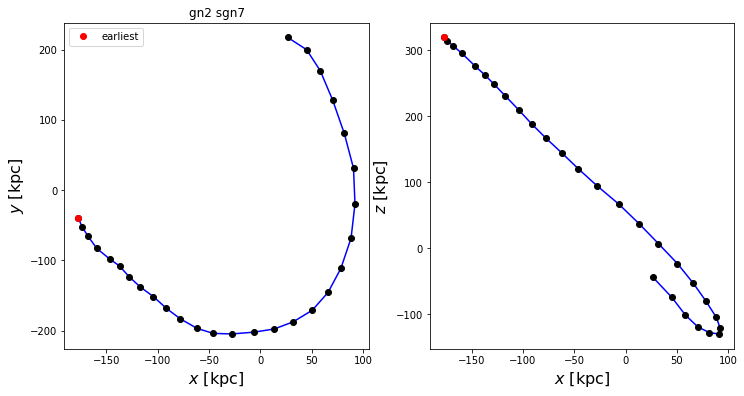

In [9]:
fig,ax = plt.subplots(ncols=2, figsize=(12,6))

ax[0].set_title('gn{} sgn{}'.format(gn,sgn))

ax[0].plot(d[:,0], d[:,1], 'b')
ax[0].plot(d[:,0], d[:,1], 'ko')
ax[0].plot(d[0,0], d[0,1], 'ro', label='earliest')
ax[0].set_xlabel('$x$ [kpc]', fontsize=16)
ax[0].set_ylabel('$y$ [kpc]', fontsize=16)

ax[1].plot(d[:,0], d[:,2], 'b')
ax[1].plot(d[:,0], d[:,2], 'ko')
ax[1].plot(d[0,0], d[0,2], 'ro')
ax[1].set_xlabel('$x$ [kpc]', fontsize=16)
ax[1].set_ylabel('$z$ [kpc]', fontsize=16)

ax[0].legend()

# Save figure:

filename = 'satellite_trajectory_gn{}sgn{}_{}.png'.format(gn,sgn,sim_id)

home = os.path.dirname(snapshot_obj.__file__)
path = os.path.join(home,"Figures",sim_id)

# If the directory does not exist, create it
if not os.path.exists(path):
    os.makedirs(path)
plt.savefig(os.path.join(path,filename), dpi=200)

# Plot evolution of mass components

In [10]:
z = np.zeros(snap_ids.size)
for i,sid in enumerate(snap_ids):
    z[i] = snapshot_obj.Snapshot(sim_id, sid).get_attribute('Redshift', 'Header')

In [11]:
masses = satellite.get_halo_data("MassType") * units.g.to(units.Msun)

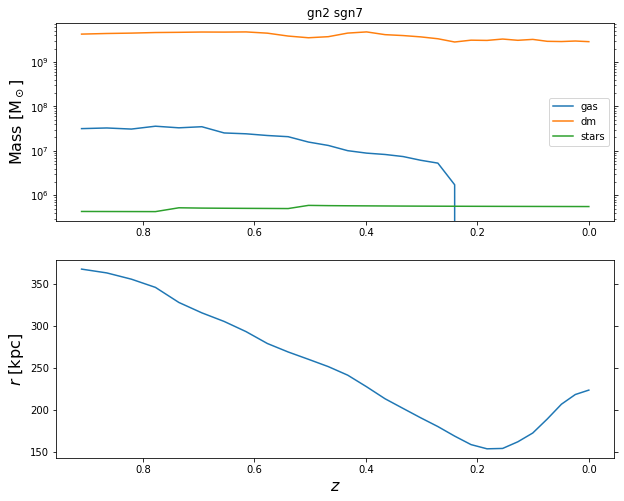

In [12]:
fig,ax = plt.subplots(nrows=2, figsize=(10,8))

ax[0].set_title('gn{} sgn{}'.format(gn,sgn))

ax[0].set_yscale('log')
ax[0].set_ylabel('Mass $[\mathrm{M_\odot}]$', fontsize=16)

ax[1].set_xlabel('$z$', fontsize=16)
ax[1].set_ylabel('$r$ [kpc]', fontsize=16)

ax[0].yaxis.set_ticks_position('both')
ax[1].yaxis.set_ticks_position('both')

ax[0].invert_xaxis()
ax[1].invert_xaxis()

for pt,l in zip([0,1,4],['gas', 'dm', 'stars']):
    ax[0].plot(z, masses[:,pt], label=l)
    
ax[0].legend()

ax[1].plot(z, np.linalg.norm(d, axis=1))

# Save figure:

filename = 'satellite_mass_evol_gn{}sgn{}_{}.png'.format(gn,sgn,sim_id)

home = os.path.dirname(snapshot_obj.__file__)
path = os.path.join(home,"Figures",sim_id)

# If the directory does not exist, create it
if not os.path.exists(path):
    os.makedirs(path)
plt.savefig(os.path.join(path,filename), dpi=200)